<a href="https://colab.research.google.com/github/mahanthnaidu/WIDS-3.0/blob/Week-1/multi_armed_bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multi Armed Bandits Simulation
In this assignment you will simulate multi-armed bandits with different behaviours using numpy, there are a total of 3 different behaviours:
*   One with probabilistic behaviour, which gives different outputs with a probabilty
*   One which gives you a noisy reward, for each input

Note : All the rewards (or mean rewards) should be randomly generated and should not be hardcoded

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The probabilistic behaviour means for each of the arms there will be a randomly generated set of rewards, {r_1, r_2, ..., r_k} and randomly generated set of probabilities {p_1, p_2, ..., p_k}. After pulling any arm, you should choose one of the rewards in its reward set with its corresponding probability and return it. The choice of value of k is upto you, but you will need numpy for k > 2.

In [22]:
class MAB_probabilistic:
    def __init__(self, num_action : int = 10) -> None:
        self.num_actions = num_action
        self.num_rewards = 5
        self.rewards = []
        self.probs = []
        for action in range(num_action):
          act_probs = np.random.uniform(0.0, 100.0, 5)
          act_probs = act_probs/np.sum(act_probs, axis=0)
          act_rewards = np.random.uniform(0.0, 1000.0, 5)
          self.rewards.append(act_rewards)
          self.probs.append(act_probs)

    def act(self, action : int) -> float:
        return np.random.choice(self.rewards[action], p=self.probs[action])

The noisy policy means for each arm, you should return a reward chosen from an underlying probability distribution (like gaussian, you can use numpy for this purpose) with a randomly generated mean and the given variance (passed to __init__)

In [23]:
class MAB_noisy:
    def __init__(self, noise_variance : float, num_action : int = 10) -> None:
        self.num_actions = num_action
        self.num_rewards = 5
        self.rewards = []
        self.probs = []
        for action in range(num_action):
          mu = np.random.uniform(0, 1)
          sigma = np.sqrt(noise_variance)
          act_probs = np.random.normal(mu, sigma, 5)
          act_probs = act_probs + (-1)*np.min(act_probs)
          act_probs = act_probs/np.sum(act_probs, axis=0)
          act_rewards = np.random.uniform(0.0, 1000.0, 5)
          self.rewards.append(act_rewards)
          self.probs.append(act_probs)

    def act(self, action : int) -> float:
        return np.random.choice(self.rewards[action], p=self.probs[action])

Initialize MAB_probabilistic with number of actions 5. Perform an action for a fixed number of time and plot the average of first n rewards against n. Make such graphs for all 5 actions in single plot.

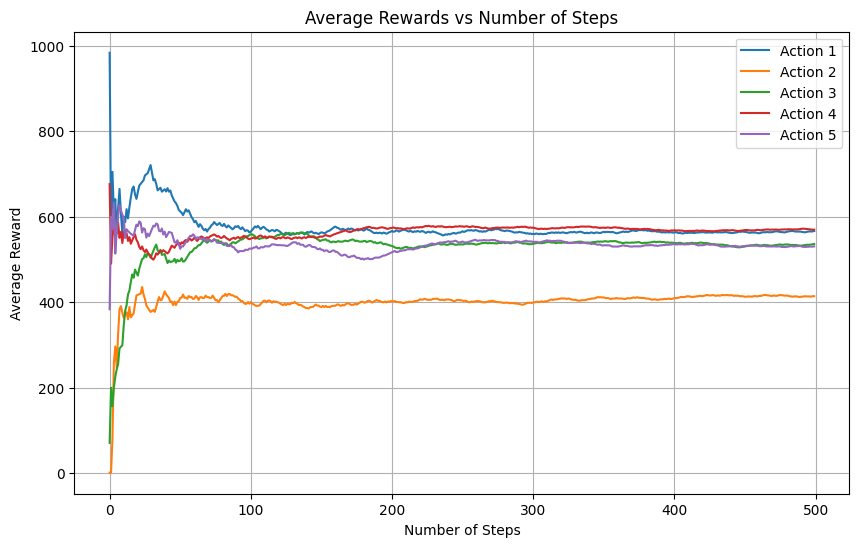

In [24]:
num_actions = 5
num_steps = 500
model = MAB_probabilistic(num_actions)
avg_rewards = np.zeros((num_actions, num_steps))

for action in range(num_actions):
    total_reward = 0.0
    for step in range(num_steps):
        total_reward += model.act(action)
        avg_rewards[action][step] = total_reward / (step + 1)

plt.figure(figsize=(10, 6))
for action in range(num_actions):
    plt.plot(np.arange(num_steps), avg_rewards[action], label=f'Action {action + 1}')

plt.title('Average Rewards vs Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

Initialize MAB_noisy with number of actions 5. Perform an action for a fixed number of time and plot the nth rewards against n. Make such graphs for all 5 actions in single plot.

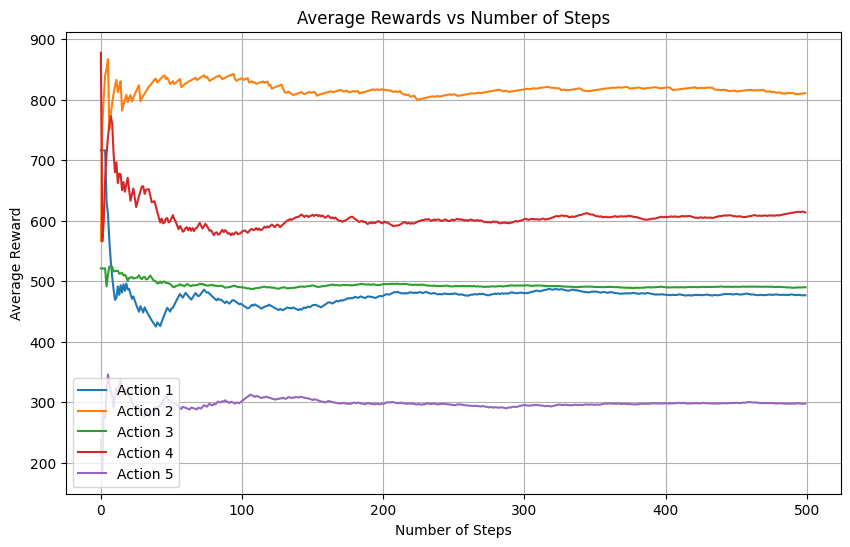

In [25]:
num_actions = 5
num_steps = 500
variance = 0.64
model = MAB_noisy(variance,num_actions)
avg_rewards = np.zeros((num_actions, num_steps))

for action in range(num_actions):
    total_reward = 0.0
    for step in range(num_steps):
        total_reward += model.act(action)
        avg_rewards[action][step] = total_reward / (step + 1)

plt.figure(figsize=(10, 6))
for action in range(num_actions):
    plt.plot(np.arange(num_steps), avg_rewards[action], label=f'Action {action + 1}')

plt.title('Average Rewards vs Number of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

Optional : Initialize any one of the above classes and find the optimal action, you can only use act() function and cannot access any class variables. Please do not search for methods on google or anywhere else, this is just a simple exercise for your own thinking.